In [1]:
##importng relevant lbraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# checking and analysing data for modelling


In [2]:
new_data=pd.read_csv('C:/Users/jsdha/Videos/phyton/project/Oil and Gas 1932-2014.csv')

In [3]:
new_data.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

In [4]:
new_data.isnull().sum()

cty_name                            0
iso3numeric                         0
id                                415
year                                0
eiacty                           1267
oil_prod32_14                    5418
oil_price_2000                     18
oil_price_nom                       0
oil_value_nom                    5418
oil_value_2000                   5418
oil_value_2014                   5418
gas_prod55_14                    6709
gas_price_2000_mboe                 0
gas_price_2000                   4301
gas_price_nom                       0
gas_value_nom                    6709
gas_value_2000                   6709
gas_value_2014                   6709
oil_gas_value_nom                5287
oil_gas_value_2000               5287
oil_gas_value_2014               5287
oil_gas_valuePOP_nom             5449
oil_gas_valuePOP_2000            5449
oil_gas_valuePOP_2014            5449
oil_exports                     11011
net_oil_exports                 11011
net_oil_expo

In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cty_name                      15521 non-null  object 
 1   iso3numeric                   15521 non-null  int64  
 2   id                            15106 non-null  object 
 3   year                          15521 non-null  int64  
 4   eiacty                        14254 non-null  object 
 5   oil_prod32_14                 10103 non-null  float64
 6   oil_price_2000                15503 non-null  float64
 7   oil_price_nom                 15521 non-null  float64
 8   oil_value_nom                 10103 non-null  float64
 9   oil_value_2000                10103 non-null  float64
 10  oil_value_2014                10103 non-null  float64
 11  gas_prod55_14                 8812 non-null   float64
 12  gas_price_2000_mboe           15521 non-null  float64
 13  g

In [6]:
new_data.describe()

,iso3numeric,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
count,15521.000000,15521.000000,1.010300e+04,15503.000000,15521.000000,1.010300e+04,1.010300e+04,1.010300e+04,8812.000000,1.552100e+04,...,4016.000000,3.880000e+03,3875.000000,3875.000000,1.290100e+04,1.180400e+04,15521.000000,15521.000000,15521.000000,1.552100e+04
mean,440.102055,1973.000000,1.834108e+07,26.513076,19.407381,4.049737e+09,4.777023e+09,6.567325e+09,100.702009,1.403597e+07,...,-0.357088,-1.944983e+07,60.045237,338.550092,2.822745e+07,2.729075e+07,0.676954,4.674194,6.425958,1.374774e+00
std,266.690184,23.959069,6.384938e+07,21.459869,27.819908,2.017801e+10,2.100122e+10,2.887193e+10,462.242415,1.102009e+07,...,146.611793,3.552873e+09,562.366542,2182.837956,9.860353e+07,9.488217e+07,0.467655,3.873224,5.324805,8.016068e-14
min,4.000000,1932.000000,0.000000e+00,7.879107,0.670000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-810.271076,-3.290943e+10,-918.095672,-7760.660272,2.510100e+04,2.510100e+04,0.000000,0.727393,1.000000,1.374774e+00
25%,204.000000,1952.000000,0.000000e+00,11.710310,1.800000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,-5.524986,-8.709102e+07,-8.372933,-81.010366,2.194275e+06,2.108201e+06,0.000000,1.161943,1.597409,1.374774e+00
50%,422.000000,1973.000000,4.980000e+04,14.067980,3.290000,2.064857e+06,7.171990e+06,9.859862e+06,0.000000,1.472159e+07,...,0.000000,0.000000e+00,0.000000,0.000000,6.469000e+06,6.178436e+06,1.000000,3.876222,5.328927,1.374774e+00
75%,694.000000,1994.000000,4.025170e+06,36.535130,25.023256,3.808598e+08,6.935786e+08,9.535135e+08,21.684397,1.915340e+07,...,0.000000,0.000000e+00,0.000000,17.434919,1.932096e+07,1.863778e+07,1.000000,6.483330,8.913110,1.374774e+00
max,998.000000,2014.000000,6.160000e+08,85.170708,111.669702,4.044369e+11,3.401958e+11,4.676922e+11,5605.121816,4.877320e+07,...,1309.582987,6.281075e+10,11205.517349,32331.463722,1.364270e+09,1.331400e+09,1.000000,13.280064,18.257080,1.374774e+00


<AxesSubplot:xlabel='oil_price_2000', ylabel='Count'>

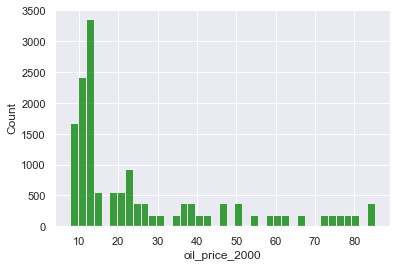

In [7]:
sns.histplot(new_data['oil_price_2000'],color='green')

<function matplotlib.pyplot.show(close=None, block=None)>

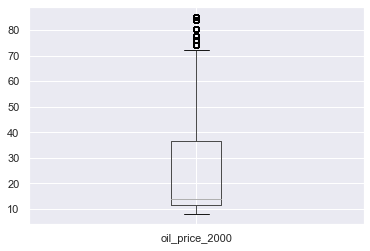

In [8]:
new_data.boxplot(column=['oil_price_2000'])
plt.show

In [9]:
#importing data with year as index
x_year=pd.read_csv('C:/Users/jsdha/Videos/phyton/project/Oil and Gas 1932-2014.csv',index_col= ['year'])

In [10]:
#dropping 'cty_name','id','eiacty','mult_nom_2000','mult_nom_2014','mult_2000_2014'
x_year.drop(['cty_name','id','eiacty','mult_nom_2000','mult_nom_2014','mult_2000_2014'],axis=1,inplace=True)

In [11]:
#checking null values
x_year.isnull().sum()

iso3numeric                         0
oil_prod32_14                    5418
oil_price_2000                     18
oil_price_nom                       0
oil_value_nom                    5418
oil_value_2000                   5418
oil_value_2014                   5418
gas_prod55_14                    6709
gas_price_2000_mboe                 0
gas_price_2000                   4301
gas_price_nom                       0
gas_value_nom                    6709
gas_value_2000                   6709
gas_value_2014                   6709
oil_gas_value_nom                5287
oil_gas_value_2000               5287
oil_gas_value_2014               5287
oil_gas_valuePOP_nom             5449
oil_gas_valuePOP_2000            5449
oil_gas_valuePOP_2014            5449
oil_exports                     11011
net_oil_exports                 11011
net_oil_exports_mt              11011
net_oil_exports_value           11011
net_oil_exports_valuePOP        11016
gas_exports                     11503
net_gas_expo

# OIL prices modelling

In [12]:
#filling na values with '0', cause considering the fact that there was no entry , so it is zero

x_year.oil_prod32_14 = x_year.oil_prod32_14.fillna(0)
x_year.oil_value_2000=x_year.oil_value_2000.fillna(0)
x_year.oil_value_2014=x_year.oil_value_2014.fillna(0)
x_year.oil_gas_value_2000=x_year.oil_gas_value_2000.fillna(0)
x_year.oil_gas_valuePOP_2014 =x_year.oil_gas_valuePOP_2014.fillna(0)


x_year.net_oil_exports=x_year.net_oil_exports.fillna(0)
x_year.net_oil_exports_value=x_year.net_oil_exports_value.fillna(0)
x_year.net_oil_exports_valuePOP=x_year.net_oil_exports_valuePOP.fillna(0)
x_year.net_oil_gas_exports_valuePOP=x_year.net_oil_gas_exports_valuePOP.fillna(0)
#18 null values belonging to TAIWAN
x_year.oil_gas_valuePOP_2000=x_year.oil_gas_valuePOP_2000.fillna(0)

In [13]:
x_year.oil_price_2000=x_year.oil_price_2000.fillna(0)
#checking null values
x_year.isnull().sum()

iso3numeric                         0
oil_prod32_14                       0
oil_price_2000                      0
oil_price_nom                       0
oil_value_nom                    5418
oil_value_2000                      0
oil_value_2014                      0
gas_prod55_14                    6709
gas_price_2000_mboe                 0
gas_price_2000                   4301
gas_price_nom                       0
gas_value_nom                    6709
gas_value_2000                   6709
gas_value_2014                   6709
oil_gas_value_nom                5287
oil_gas_value_2000                  0
oil_gas_value_2014               5287
oil_gas_valuePOP_nom             5449
oil_gas_valuePOP_2000               0
oil_gas_valuePOP_2014               0
oil_exports                     11011
net_oil_exports                     0
net_oil_exports_mt              11011
net_oil_exports_value               0
net_oil_exports_valuePOP            0
gas_exports                     11503
net_gas_expo

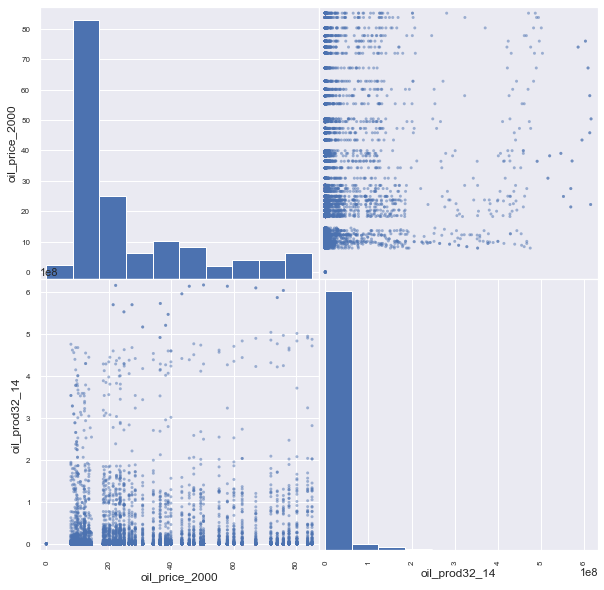

In [14]:
from pandas.plotting import scatter_matrix
features = ['oil_price_2000', 'oil_prod32_14']
scatter_matrix(x_year[features],figsize=(10,10))
plt.show()

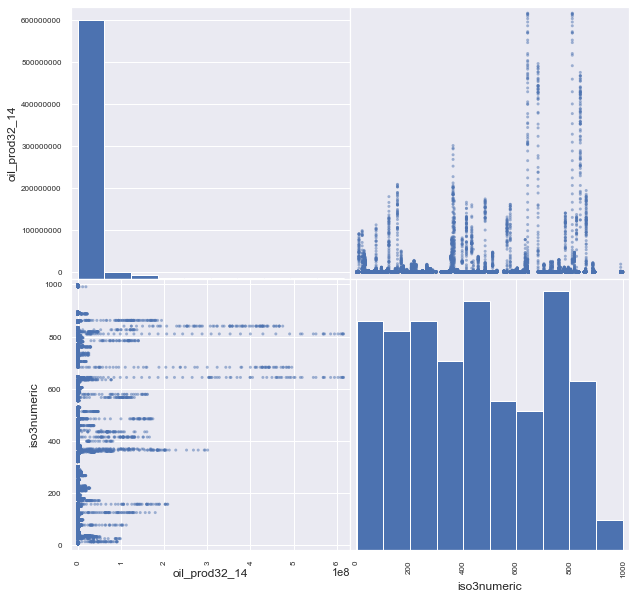

In [15]:
features = ['oil_prod32_14', 'iso3numeric']
scatter_matrix(x_year[features],figsize=(10,10))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(x_year,test_size=0.3)


In [17]:
##inflation adjusted modeleing for 32-14

##initial modelling done with oil_gas_value_2000

x_train=train[['iso3numeric','oil_prod32_14','oil_value_2000','oil_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_train=train['oil_price_2000']
x_train.isnull().sum()

iso3numeric                     0
oil_prod32_14                   0
oil_value_2000                  0
oil_value_2014                  0
oil_gas_valuePOP_2000           0
oil_gas_valuePOP_2014           0
net_oil_exports                 0
net_oil_exports_value           0
net_oil_exports_valuePOP        0
net_oil_gas_exports_valuePOP    0
sovereign                       0
dtype: int64

In [18]:
regressor_oil= RandomForestRegressor(n_estimators=50)
# training the model
regressor_oil.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [19]:
x_test=test[['iso3numeric','oil_prod32_14','oil_value_2000','oil_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_test=test['oil_price_2000']

In [20]:
pred_3214=regressor_oil.predict(x_test)

In [21]:
error_3214 = y_test - pred_3214
np.mean(error_3214)

0.018130817900099943

In [22]:
def RMSE(i):
    temp = np.sqrt(np.mean(i**2))
    return temp

RMSE(error_3214)


13.908860767947582

## seprating data till 1970, and 1970 onwards

In [23]:
#collecting data from 1932 to 1970
train_32_70=train.loc[train.index<=1970,:]
test_32_70=test.loc[test.index<=1970,:]


In [24]:
train_32_70.isnull().sum()

iso3numeric                        0
oil_prod32_14                      0
oil_price_2000                     0
oil_price_nom                      0
oil_value_nom                   3118
oil_value_2000                     0
oil_value_2014                     0
gas_prod55_14                   3960
gas_price_2000_mboe                0
gas_price_2000                  2962
gas_price_nom                      0
gas_value_nom                   3960
gas_value_2000                  3960
gas_value_2014                  3960
oil_gas_value_nom               3078
oil_gas_value_2000                 0
oil_gas_value_2014              3078
oil_gas_valuePOP_nom            3197
oil_gas_valuePOP_2000              0
oil_gas_valuePOP_2014              0
oil_exports                     5068
net_oil_exports                    0
net_oil_exports_mt              5068
net_oil_exports_value              0
net_oil_exports_valuePOP           0
gas_exports                     5068
net_gas_exports_bcf             5068
n

In [25]:
#multiple linear model for upto 1970 year prices
##dropping variables
x_1=train_32_70[['iso3numeric','oil_prod32_14','oil_value_2000','oil_gas_value_2000','oil_gas_valuePOP_2000','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_1=train_32_70['oil_price_2000']

In [26]:
regressor_oil_3270= RandomForestRegressor(n_estimators=50)
# training the model
regressor_oil_3270.fit(x_1,y_1)


RandomForestRegressor(n_estimators=50)

In [27]:
x1=test_32_70[['iso3numeric','oil_prod32_14','oil_value_2000','oil_gas_value_2000','oil_gas_valuePOP_2000','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y1=test_32_70['oil_price_2000']


In [28]:
price_pred_3270=regressor_oil_3270.predict(x1)

In [29]:
error_3270 = y1- price_pred_3270
np.mean(error_3270)

-0.012572892356870844

In [30]:
RMSE(error_3270)



1.4640762496198916

In [31]:
train_71_14=train.loc[train.index>1971,:]
test_71_14=test.loc[test.index>1971,:]

In [32]:
x_1=train_71_14[['iso3numeric','oil_prod32_14','oil_value_2000','oil_gas_value_2000','oil_gas_valuePOP_2000','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_1=train_71_14['oil_price_2000']

In [33]:
regressor_oil_71_14= RandomForestRegressor(n_estimators=100)
# training the model
regressor_oil_71_14.fit(x_1,y_1)

RandomForestRegressor()

In [34]:
x_test=test_71_14[['iso3numeric','oil_prod32_14','oil_value_2000','oil_gas_value_2000','oil_gas_valuePOP_2000','net_oil_exports','net_oil_exports_value','net_oil_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_test=test_71_14['oil_price_2000']

In [35]:
price_pred_7114=regressor_oil_71_14.predict(x_test)


In [36]:
error_7114 = y_test - price_pred_7114
np.mean(error_7114)

0.31965828753549097

In [37]:
RMSE(error_7114)

14.901990885734785

# GAS modelling


In [38]:
new_data_g=new_data.loc[new_data.index>=1955,:]
new_data_g=new_data.loc[new_data.index>=1955,:]

<AxesSubplot:xlabel='gas_price_2000', ylabel='Count'>

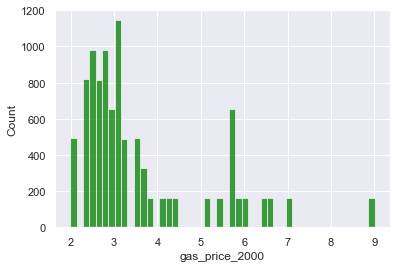

In [39]:
sns.histplot(new_data_g['gas_price_2000'],color='green')

<function matplotlib.pyplot.show(close=None, block=None)>

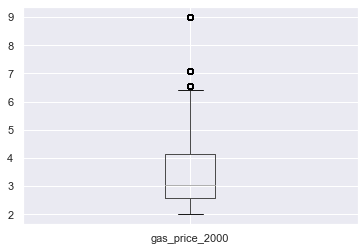

In [40]:
new_data_g.boxplot(column=['gas_price_2000'])
plt.show

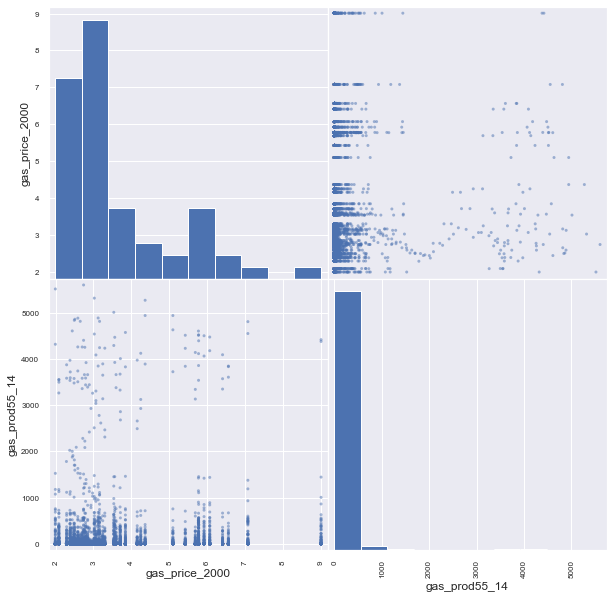

In [41]:
features = ['gas_price_2000', 'gas_prod55_14']
scatter_matrix(new_data_g[features],figsize=(10,10))
plt.show()

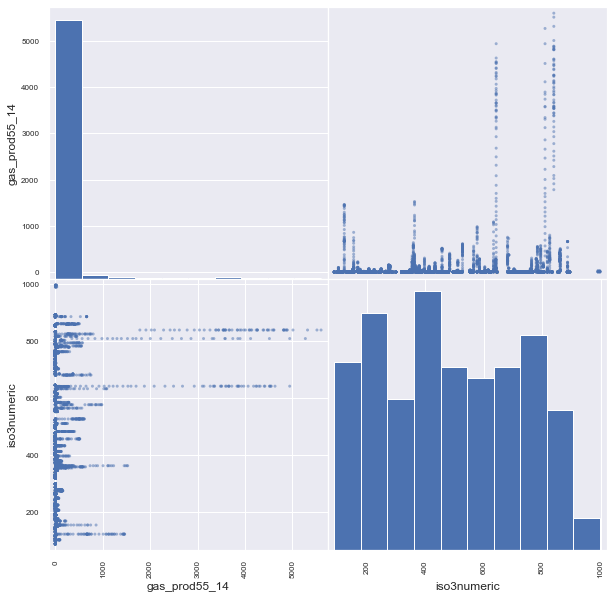

In [42]:
features = ['gas_prod55_14', 'iso3numeric']
scatter_matrix(new_data_g[features],figsize=(10,10))
plt.show()

In [43]:
train_g=train.loc[train.index>=1955,:]
test_g=test.loc[test.index>=1955,:]

In [44]:
train_g.isnull().sum()

iso3numeric                        0
oil_prod32_14                      0
oil_price_2000                     0
oil_price_nom                      0
oil_value_nom                   1484
oil_value_2000                     0
oil_value_2014                     0
gas_prod55_14                   1707
gas_price_2000_mboe                0
gas_price_2000                     0
gas_price_nom                      0
gas_value_nom                   1707
gas_value_2000                  1707
gas_value_2014                  1707
oil_gas_value_nom               1391
oil_gas_value_2000                 0
oil_gas_value_2014              1391
oil_gas_valuePOP_nom            1391
oil_gas_valuePOP_2000              0
oil_gas_valuePOP_2014              0
oil_exports                     4709
net_oil_exports                    0
net_oil_exports_mt              4709
net_oil_exports_value              0
net_oil_exports_valuePOP           0
gas_exports                     5052
net_gas_exports_bcf             5054
n

In [45]:
train_g.gas_prod55_14 =train_g.gas_prod55_14.fillna(0)
test_g.gas_prod55_14 =test_g.gas_prod55_14.fillna(0)
train_g.gas_value_2000 =train_g.gas_value_2000.fillna(0)
test_g.gas_value_2000 =test_g.gas_value_2000.fillna(0)
train_g.gas_value_2014 =train_g.gas_value_2014.fillna(0)
test_g.gas_value_2014 =test_g.gas_value_2014.fillna(0)
train_g.net_gas_exports_mboe =train_g.net_gas_exports_mboe.fillna(0)
test_g.net_gas_exports_mboe =test_g.net_gas_exports_mboe.fillna(0)
train_g.net_gas_exports_value =train_g.net_gas_exports_value.fillna(0)
test_g.net_gas_exports_value =test_g.net_gas_exports_value.fillna(0)
train_g.net_gas_exports_valuePOP =train_g.net_gas_exports_valuePOP.fillna(0)
test_g.net_gas_exports_valuePOP =test_g.net_gas_exports_valuePOP.fillna(0)
train_g.isnull().sum()

C:\Users\jsdha\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


iso3numeric                        0
oil_prod32_14                      0
oil_price_2000                     0
oil_price_nom                      0
oil_value_nom                   1484
oil_value_2000                     0
oil_value_2014                     0
gas_prod55_14                      0
gas_price_2000_mboe                0
gas_price_2000                     0
gas_price_nom                      0
gas_value_nom                   1707
gas_value_2000                     0
gas_value_2014                     0
oil_gas_value_nom               1391
oil_gas_value_2000                 0
oil_gas_value_2014              1391
oil_gas_valuePOP_nom            1391
oil_gas_valuePOP_2000              0
oil_gas_valuePOP_2014              0
oil_exports                     4709
net_oil_exports                    0
net_oil_exports_mt              4709
net_oil_exports_value              0
net_oil_exports_valuePOP           0
gas_exports                     5052
net_gas_exports_bcf             5054
n

In [46]:
test_g.isnull().sum()

iso3numeric                        0
oil_prod32_14                      0
oil_price_2000                     0
oil_price_nom                      0
oil_value_nom                    603
oil_value_2000                     0
oil_value_2014                     0
gas_prod55_14                      0
gas_price_2000_mboe                0
gas_price_2000                     0
gas_price_nom                      0
gas_value_nom                    701
gas_value_2000                     0
gas_value_2014                     0
oil_gas_value_nom                565
oil_gas_value_2000                 0
oil_gas_value_2014               565
oil_gas_valuePOP_nom             565
oil_gas_valuePOP_2000              0
oil_gas_valuePOP_2014              0
oil_exports                     2001
net_oil_exports                    0
net_oil_exports_mt              2001
net_oil_exports_value              0
net_oil_exports_valuePOP           0
gas_exports                     2150
net_gas_exports_bcf             2150
n

In [47]:
x_train_g=train_g[['iso3numeric','gas_prod55_14','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_gas_exports_mboe','net_gas_exports_value','net_gas_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_train_g=train_g['gas_price_2000']


In [48]:
regressor_gas= RandomForestRegressor(n_estimators=50)
# training the model
regressor_gas.fit(x_train_g,y_train_g)




RandomForestRegressor(n_estimators=50)

In [49]:
x_test_g=test_g[['iso3numeric','gas_prod55_14','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_gas_exports_mboe','net_gas_exports_value','net_gas_exports_valuePOP','net_oil_gas_exports_valuePOP','sovereign']]
y_test_g=test_g['gas_price_2000']

In [50]:
gas_price_pred=regressor_gas.predict(x_test_g)
error_gas = y_test_g - gas_price_pred
np.mean(error_gas)

0.0010442501787757137

In [51]:
RMSE(error_gas)

1.0350021083234986

# oil price modelling with complete dataset


In [61]:
train.isnull().sum()

iso3numeric                        0
oil_prod32_14                      0
oil_price_2000                     0
oil_price_nom                      0
oil_value_nom                   3747
oil_value_2000                     0
oil_value_2014                     0
gas_prod55_14                      0
gas_price_2000_mboe                0
gas_price_2000                     0
gas_price_nom                      0
gas_value_nom                   4669
gas_value_2000                     0
gas_value_2014                     0
oil_gas_value_nom               3654
oil_gas_value_2000                 0
oil_gas_value_2014                 0
oil_gas_valuePOP_nom            3773
oil_gas_valuePOP_2000              0
oil_gas_valuePOP_2014              0
oil_exports                     7671
net_oil_exports                    0
net_oil_exports_mt              7671
net_oil_exports_value              0
net_oil_exports_valuePOP           0
gas_exports                        0
net_gas_exports_bcf             8016
n

In [60]:
train.gas_prod55_14=train.gas_prod55_14.fillna(0)
train.gas_price_2000=train.gas_price_2000.fillna(0)
train.gas_value_2000=train.gas_value_2000.fillna(0)
train.gas_value_2014=train.gas_value_2014.fillna(0)
train.oil_gas_value_2014=train.oil_gas_value_2014.fillna(0)
train.gas_exports=train.gas_exports.fillna(0)
train.net_gas_exports_value=train.net_gas_exports_value.fillna(0)


In [69]:
test.gas_prod55_14=test.gas_prod55_14.fillna(0)
test.gas_price_2000=test.gas_price_2000.fillna(0)
test.gas_value_2000=test.gas_value_2000.fillna(0)
test.gas_value_2014=test.gas_value_2014.fillna(0)
test.oil_gas_value_2014=test.oil_gas_value_2014.fillna(0)
test.gas_exports=test.gas_exports.fillna(0)
test.net_gas_exports_value=test.net_gas_exports_value.fillna(0)


C:\Users\jsdha\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
x_train_og=train[['oil_prod32_14','oil_value_2000','oil_value_2014','gas_prod55_14','gas_price_2000','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','gas_exports','net_gas_exports_value','net_oil_gas_exports_valuePOP','sovereign']]
y_train_og=train['oil_price_2000']

In [64]:
regressor_ogas= RandomForestRegressor(n_estimators=50)
# training the model
regressor_ogas.fit(x_train_og,y_train_og)


RandomForestRegressor(n_estimators=50)

In [70]:
x_test_og=test[['oil_prod32_14','oil_value_2000','oil_value_2014','gas_prod55_14','gas_price_2000','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','gas_exports','net_gas_exports_value','net_oil_gas_exports_valuePOP','sovereign']]
y_test_og=test['oil_price_2000']

In [71]:
oil_gas_price_pred=regressor_ogas.predict(x_test_og)
error_ogas = y_test_og - oil_gas_price_pred
np.mean(error_ogas)

-0.02066362953852748

In [72]:
RMSE(error_ogas)

0.9187056108201493

In [73]:
x_train_go=train[['oil_prod32_14','oil_value_2000','oil_value_2014','gas_prod55_14','gas_price_2000','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','gas_exports','net_gas_exports_value','net_oil_gas_exports_valuePOP','sovereign']]
y_train_go=train['gas_price_2000']

In [74]:
regressor_oilg= RandomForestRegressor(n_estimators=50)
# training the model
regressor_oilg.fit(x_train_go,y_train_go)


RandomForestRegressor(n_estimators=50)

In [75]:
x_test_go=test[['oil_prod32_14','oil_value_2000','oil_value_2014','gas_prod55_14','gas_price_2000','gas_value_2000','gas_value_2014','oil_gas_valuePOP_2000','oil_gas_valuePOP_2014','net_oil_exports','net_oil_exports_value','gas_exports','net_gas_exports_value','net_oil_gas_exports_valuePOP','sovereign']]
y_test_go=test['gas_price_2000']

In [76]:
gas_price_pred=regressor_oilg.predict(x_test_go)
error_oilg = y_test_go - gas_price_pred
np.mean(error_oilg)

1.859510326836208e-17

In [77]:
RMSE(error_oilg)

3.247877250516528e-15